In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
colli=pd.read_csv('CollisionRecords.txt',sep=',',header=0,error_bad_lines=False)
party=pd.read_csv('PartyRecords.txt',sep=',',header=0,error_bad_lines=False)
sd_collision = pd.read_csv('sd_CollisionRecords.txt')
sd_party = pd.read_csv('sd_PartyRecords.txt')
#sd_collision = pd.read_csv('pd_collisions_datasd_v1.csv')

b'Skipping line 1667771: expected 76 fields, saw 77\n'


In [36]:
#1.2
sd_collision['YEAR'] = sd_collision.date_time.apply(lambda x:int(x[:4]))
sd_collision['MONTH'] = sd_collision.date_time.apply(lambda x:int(x.split("-")[1]))

sd_collision.YEAR.unique()

array([2018, 2019, 2020])

In [32]:
sd_collision_DUI = sd_collision[sd_collision['charge_desc'].str.contains("DUI")]
sd_collision_DUI.shape

(595, 18)

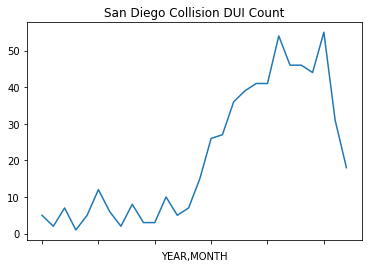

In [34]:
sd_collision_DUI.groupby(["YEAR",'MONTH']).size().plot(title = 'San Diego Collision DUI Count')

In [45]:
sd_collision

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE
0,6292256,2015,20170404,3711,20150424,2235,4823,SAN,5,5,...,0,0,0,0,0,0,-,-,NaN,NaN
1,6292258,2015,20150608,3711,20150428,2008,4576,NaN,2,5,...,1,0,0,0,0,0,-,-,NaN,NaN
2,6292266,2015,20150611,3711,20150430,1418,4243,NaN,4,5,...,1,0,0,0,0,0,-,-,NaN,NaN
3,6292465,2015,20150805,3711,20150714,1831,5600,NaN,2,5,...,0,0,0,0,0,0,-,-,NaN,NaN
4,6292479,2015,20150812,3711,20150629,2145,3792,3711,1,5,...,0,0,0,0,1,0,-,-,NaN,NaN
5,6292481,2015,20150812,3711,20150715,2129,3815,NaN,3,5,...,1,0,0,0,0,0,-,-,NaN,NaN
6,6292660,2015,20150915,3711,20150813,1823,5046,NaN,4,5,...,1,0,0,0,0,0,-,-,NaN,NaN
7,6292680,2015,20150922,3711,20150822,730,3661,TRAFF,6,5,...,0,0,0,0,0,0,-,-,NaN,NaN
8,6292683,2015,20150921,3711,20150831,1726,5600,NaN,1,5,...,1,0,0,0,0,0,-,-,NaN,NaN
9,6292700,2015,20170329,3711,20150830,1608,4243,NaN,7,5,...,0,0,0,0,1,0,-,-,NaN,NaN


In [64]:
sd_collision['Month'] = sd_collision.COLLISION_DATE.apply(lambda x: int(str(x)[4:6]))
sd_collision['Year'] = sd_collision.COLLISION_DATE.apply(lambda x: int(str(x)[:4]))

sd_collision = sd_collision[sd_collision.PCF_VIOL_CATEGORY == '01']

sd_collision.groupby(['Year']).size().to_frame('size')

#sd_collision.Year.unique()

,size
Year,
2015,18
2016,26
2017,25
2018,24
2019,28
2020,1


In [47]:
sd_party[sd_party.PARTY_DRUG_PHYSICAL == 'E'].shape

(242, 33)

In [65]:
new.shape

(4866995, 109)

In [4]:
new=pd.merge(colli,party, on='CASE_ID')#,how='right')
drug=new[new['PARTY_DRUG_PHYSICAL']=='E'] #E: under drug inflience
new[new['PCF_VIOL_CATEGORY']=='01'] #Driving or Bicycling Under the Influence of Alcohol or Drug

new.columns.tolist()

['CASE_ID',
 'ACCIDENT_YEAR',
 'PROC_DATE',
 'JURIS',
 'COLLISION_DATE',
 'COLLISION_TIME',
 'OFFICER_ID',
 'REPORTING_DISTRICT',
 'DAY_OF_WEEK',
 'CHP_SHIFT',
 'POPULATION',
 'CNTY_CITY_LOC',
 'SPECIAL_COND',
 'BEAT_TYPE',
 'CHP_BEAT_TYPE',
 'CITY_DIVISION_LAPD',
 'CHP_BEAT_CLASS',
 'BEAT_NUMBER',
 'PRIMARY_RD',
 'SECONDARY_RD',
 'DISTANCE',
 'DIRECTION',
 'INTERSECTION',
 'WEATHER_1',
 'WEATHER_2',
 'STATE_HWY_IND',
 'CALTRANS_COUNTY',
 'CALTRANS_DISTRICT',
 'STATE_ROUTE',
 'ROUTE_SUFFIX',
 'POSTMILE_PREFIX',
 'POSTMILE',
 'LOCATION_TYPE',
 'RAMP_INTERSECTION',
 'SIDE_OF_HWY',
 'TOW_AWAY',
 'COLLISION_SEVERITY',
 'NUMBER_KILLED',
 'NUMBER_INJURED',
 'PARTY_COUNT',
 'PRIMARY_COLL_FACTOR',
 'PCF_CODE_OF_VIOL',
 'PCF_VIOL_CATEGORY',
 'PCF_VIOLATION',
 'PCF_VIOL_SUBSECTION',
 'HIT_AND_RUN',
 'TYPE_OF_COLLISION',
 'MVIW',
 'PED_ACTION',
 'ROAD_SURFACE',
 'ROAD_COND_1',
 'ROAD_COND_2',
 'LIGHTING',
 'CONTROL_DEVICE',
 'CHP_ROAD_TYPE',
 'PEDESTRIAN_ACCIDENT',
 'BICYCLE_ACCIDENT',
 'MOTORCYC

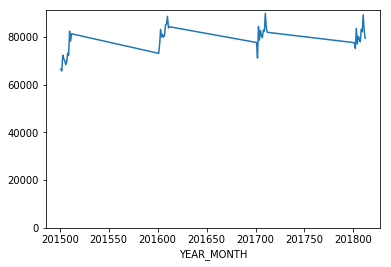

In [5]:
#1.3
new['YEAR_MONTH'] = new.COLLISION_DATE.apply(lambda x: int(str(x)[:6]))

new['YEAR_MONTH'].unique()
new.groupby('YEAR_MONTH').size().iloc[0:48].plot(ylim=0)

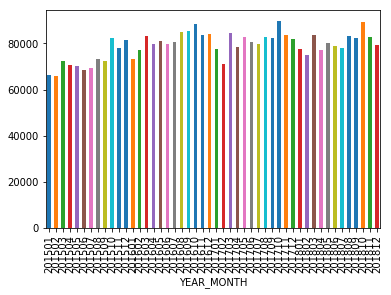

In [6]:
(new.groupby('YEAR_MONTH')['CASE_ID'].count()).iloc[0:48].plot(kind='bar')

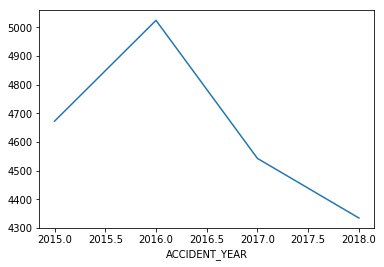

In [24]:
#2.1
drug.groupby('ACCIDENT_YEAR').size().iloc[:4].plot()

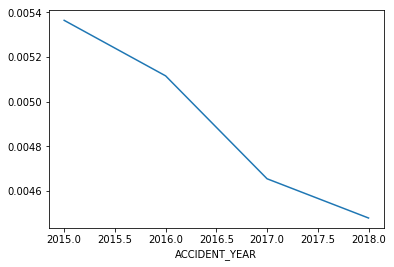

In [8]:
#2.2
(drug.groupby('ACCIDENT_YEAR')['CASE_ID'].count()/new.groupby('ACCIDENT_YEAR')['CASE_ID'].count()).iloc[0:4].plot()

/Users/melodyzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/melodyzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


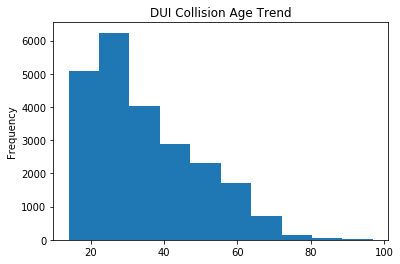

In [9]:
#3.1
drug['PARTY_AGE'] = pd.to_numeric(drug['PARTY_AGE'], errors='coerce')
drug['PARTY_AGE'] = drug['PARTY_AGE'].apply(lambda x: np.NaN if ((float(x) < 14) | (float(x) > 99)) else x)

drug.PARTY_AGE.plot(kind='hist', title='DUI Collision Age Trend')

Text(0, 0.5, 'Rate')

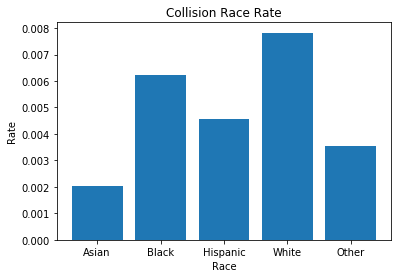

In [10]:
#4.1
drug.groupby('RACE').size()/new.groupby('RACE').size()

race = pd.DataFrame({'Race':['Asian', 'Black', 'Hispanic', 'White','Other'], 
                         'Rate':[0.002048, 0.006235, 0.004566, 0.007826, 0.003528]})
plt.bar(race['Race'], race['Rate'])
plt.title("Collision Race Rate")
plt.xlabel('Race')
plt.ylabel('Rate')
#plt.xticks(rotation=90)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

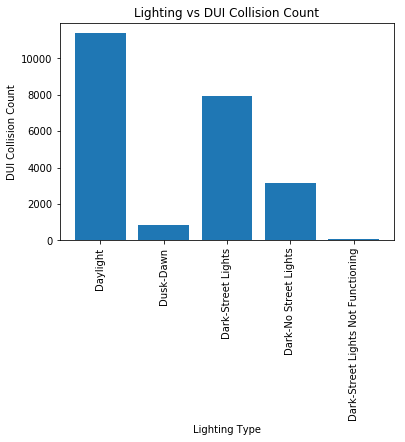

In [11]:
#5.1
drug.groupby('LIGHTING').size()

lighting = pd.DataFrame({'Lighting':['Daylight', 'Dusk-Dawn', 'Dark-Street Lights', 'Dark-No Street Lights','Dark-Street Lights Not Functioning'], 
                         'Count':[11379, 829, 7912, 3142, 71]})
plt.bar(lighting['Lighting'], lighting['Count'])
plt.title("Lighting vs DUI Collision Count")
plt.xlabel('Lighting Type')
plt.ylabel('DUI Collision Count')
plt.xticks(rotation=90)